In [ ]:
### Maciej Wilhelmi 252938 AMC_1 Reddit wybory

Link do colaba: https://colab.research.google.com/drive/1bhTfZUoLCw0rHXDiWpX5NvNrYcb1KNsa?usp=sharing

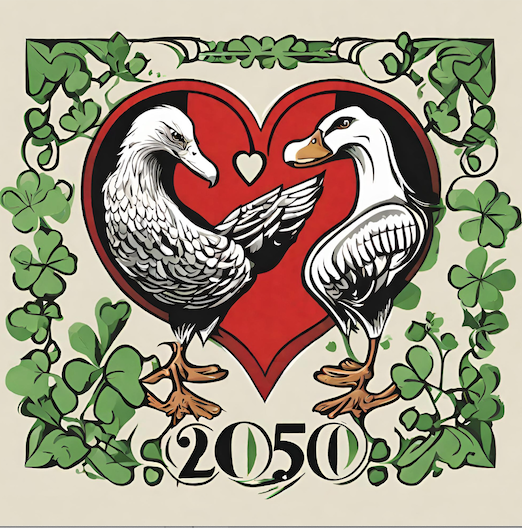

In [1]:
!pip install -q praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.6 MB/s eta 0:00:00


In [12]:
import praw
import prawcore.exceptions
import pandas as pd
import time
import plotly.express as px
from tqdm.notebook import tqdm

#Scrapowanie Redditów

In [3]:
# Konfiguracja API Reddit
try:
    reddit = praw.Reddit(client_id='QwKL8drF8AWr1JN_mrargg',
                     client_secret='LPZNOSpw97FsN5J9IXlRgEwrj04wLg',
                     user_agent='pdiow01',
                     username='mackookcam', check_for_async=False)
except praw.exceptions.MissingRequiredAttributeException as e:
    print("Wrong authorization credentials.")

In [4]:
subreddits = [reddit.subreddit("Polska"), reddit.subreddit("libek"),
              reddit.subreddit("PolskaPolityka")]

# Polityczne tematy
topics = [
    "partia polityczna", "polityka", "rząd", "opozycja", "wybory", "parlament", "prezydent", "Sejm", "Senat",
    "kampania wyborcza", "polityk", "legislacja", "reforma", "konstytucja", "demokracja", "prawo", "władza",
    "zarządzanie", "polityka społeczna", "gospodarka", "budżet", "polityka zagraniczna", "korupcja",
    "wydarzenia polityczne", "debata", "przemówienie", "manifestacja", "strajk", "wyborcy", "obywatele",
    "decyzje polityczne", "koalicja", "koalicja rządząca", "opozycja parlamentarzysta", "ustawa", "referendum",
    "administracja publiczna", "stosunki międzynarodowe", "media polityczne", "socjalizm", "konserwatyzm",
    "liberalizm", "ekologia polityczna", "bezpieczeństwo narodowe", "integracja europejska", "partycypacja obywatelska",
    "decentralizacja", "walka z przestępczością", "polityka migracyjna", "samorządy", "PiS", "konfederacja", "PO",
    "Tusk", "Kaszyński", "PSL", "Hołownia", "PSL", "Wyborca", "Rządzenie", "Partycypacja", "Dyplomacja", "Reforma społeczna",
    "Dyplomata", "Kryzys polityczny", "Agitacja", "Ustrojowy", "Lobbing",
    "Sojusz", "Opozycjonista", "Interpelacja", "Weto", "Biurokracja", "Senator", "Prezydentura", "Ministerstwo", "Premier",
    "unia europejska", 'ONZ', 'totalitaryzm', 'nazizm', 'komunizm'
]

In [6]:
len(topics)

82

In [5]:
# Batches

t1 = topics[:25]
t2 = topics[25:50]
t3 = topics[50:65]
t4 = topics[65:]

In [ ]:
# Tematy ogólne
topics_general = [
    "post", "zdjęcie", "film", "rozrywka", "kultura", "sport", "muzyka", "moda", "lifestyle",
    "komentarz", "hashtag", "trendy", "relacje", "informacje", "wydarzenia", "promocja", "aktualności",
    "gaming", "inspiracja", "mem", "selfie", "video", "historia", "edukacja", "ciekawostki", "sztuka",
    "pytanie", "konkurs", "opinie", "opowieści", "zdrowie", "kulinaria", "podróże", "zwierzęta", "humor",
    "pogoda", "wywiad", "piękno", "technologia", "motywacja", "aktywizm", "memes", "wywiad", "recenzja",
    "ciekawe artykuły", "trending", "lajki", "udostępnienia", "repost", "wybory", "klimat", "pogoda"
]

In [41]:
# Wczytywanie subredditów

def load_subreddit(sub_name, topics):
    posts = []
    post_comments = []
    comments_replies = []
    already_downloaded = {}

    for topic in tqdm(topics):
        while True:
            try:
                for post in sub_name.search(topic, limit=10000):
                    if post.id not in already_downloaded:
                        posts.append([post.title, post.score, post.id, post.downs,
                                      post.num_comments, post.selftext.replace('\n', ' '),
                                      post.created_utc, str(post.author.name), topic,
                                      "post", post.id, post.author_flair_text])
                        already_downloaded[post.id] = True

                        post.comment_sort = 'top'
                        post.comment_limit = None
                        post.comments.replace_more(limit=None)

                        for comment in post.comments.list():
                            if comment.id not in already_downloaded:
                                comment_data = [comment.body.replace('\n', ' '),
                                                str(comment.author), comment.created_utc,
                                                len(comment.replies), comment.score,
                                                comment.downs, topic, comment.id, "comment",
                                                post.id, post.author_flair_text]
                                post_comments.append(comment_data)
                                already_downloaded[comment.id] = True

                                for reply in comment.replies:
                                    if reply.id not in already_downloaded:
                                        reply_data = [reply.body.replace('\n', ' '),
                                                      str(reply.author), reply.created_utc,
                                                      len(reply.replies), reply.score,
                                                      reply.downs, topic, reply.id, "reply",
                                                      comment.id, post.author_flair_text]
                                        comments_replies.append(reply_data)
                                        already_downloaded[reply.id] = True

                break
            except prawcore.exceptions.TooManyRequests:
                print(f'Waiting for 1 minute before trying again :(')
                time.sleep(60)
            print(topic)

    return posts, post_comments, comments_replies

In [42]:
post, com, repl = load_subreddit(subreddits[0], t1)

  0%|          | 0/25 [00:00<?, ?it/s]

Waiting for 1 minute before trying again :(
polityka
Waiting for 1 minute before trying again :(
polityka
Waiting for 1 minute before trying again :(
polityka
Waiting for 1 minute before trying again :(
polityka
Waiting for 1 minute before trying again :(
rząd
Waiting for 1 minute before trying again :(
opozycja
Waiting for 1 minute before trying again :(
wybory
Waiting for 1 minute before trying again :(
wybory
Waiting for 1 minute before trying again :(
prezydent
Waiting for 1 minute before trying again :(
Sejm
Waiting for 1 minute before trying again :(
Senat
Waiting for 1 minute before trying again :(
polityk
Waiting for 1 minute before trying again :(
konstytucja
Waiting for 1 minute before trying again :(
władza
Waiting for 1 minute before trying again :(
gospodarka


In [ ]:
post, com, repl = load_subreddit(subreddits[0], t2)

In [ ]:
post, com, repl = load_subreddit(subreddits[0], t3)

In [ ]:
post, com = load_subreddit(subreddits[0], t4)

In [ ]:
post, com = load_subreddit(subreddits[0], topics_general)

  0%|          | 0/52 [00:00<?, ?it/s]

Waiting for 1 minute before trying again :(
Waiting for 1 minute before trying again :(
Waiting for 1 minute before trying again :(
Waiting for 1 minute before trying again :(
Waiting for 1 minute before trying again :(


In [44]:
df_posts = pd.DataFrame(post, columns=['body', 'score', 'id', 'downs',
                                        'num_comments', 'text', 'created',
                                        'author', 'topic', 'type', 'parent_id',
                                        'flair'])

df_posts['created'] = pd.to_datetime(df_posts['created'], unit='s',
                                     origin='unix')

df_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   body          3388 non-null   object        
 1   score         3388 non-null   int64         
 2   id            3388 non-null   object        
 3   downs         3388 non-null   int64         
 4   num_comments  3388 non-null   int64         
 5   text          3388 non-null   object        
 6   created       3388 non-null   datetime64[ns]
 7   author        3388 non-null   object        
 8   topic         3388 non-null   object        
 9   type          3388 non-null   object        
 10  parent_id     3388 non-null   object        
 11  flair         1914 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 317.8+ KB


In [45]:
df_comments = pd.DataFrame(com, columns=['body', 'author', 'created',
                                          'num_comments', 'score',
                                          'downs', 'topic', 'id', 'type',
                                          'parent_id', 'flair'])

df_comments['created'] = pd.to_datetime(df_comments['created'], unit='s',
                                        origin='unix')

df_comments['author'].fillna('Anonim', inplace=True) #anonimy bez nazw

df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77777 entries, 0 to 77776
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   body          77777 non-null  object        
 1   author        77777 non-null  object        
 2   created       77777 non-null  datetime64[ns]
 3   num_comments  77777 non-null  int64         
 4   score         77777 non-null  int64         
 5   downs         77777 non-null  int64         
 6   topic         77777 non-null  object        
 7   id            77777 non-null  object        
 8   type          77777 non-null  object        
 9   parent_id     77777 non-null  object        
 10  flair         41027 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 6.5+ MB


In [46]:
df_replies = pd.DataFrame(repl, columns=['body', 'author', 'created', 'num_comments',
                                        'score', 'downs', 'topic', 'id', 'type',
                                         'parent_id', 'flair'])

df_replies['created'] = pd.to_datetime(df_replies['created'], unit='s',
                                     origin='unix')

df_replies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54750 entries, 0 to 54749
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   body          54750 non-null  object        
 1   author        54750 non-null  object        
 2   created       54750 non-null  datetime64[ns]
 3   num_comments  54750 non-null  int64         
 4   score         54750 non-null  int64         
 5   downs         54750 non-null  int64         
 6   topic         54750 non-null  object        
 7   id            54750 non-null  object        
 8   type          54750 non-null  object        
 9   parent_id     54750 non-null  object        
 10  flair         29645 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 4.6+ MB


In [47]:
#Połączenie postów, komentarzy i odpowiedzi w jeden df

wybory_df = pd.concat([df_posts[['body', 'created', 'author', 'num_comments',
                                 'score', 'downs', 'topic', 'id', 'type',
                                 'parent_id', 'flair']],
                       df_comments[['body', 'created', 'author', 'num_comments',
                                    'score', 'downs', 'topic', 'id', 'type',
                                    'parent_id', 'flair']],
                       df_replies[['body', 'created', 'author', 'num_comments',
                                    'score', 'downs', 'topic', 'id', 'type',
                                    'parent_id', 'flair']]],
                      ignore_index=True, axis=0)

In [48]:
wybory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135915 entries, 0 to 135914
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   body          135915 non-null  object        
 1   created       135915 non-null  datetime64[ns]
 2   author        135915 non-null  object        
 3   num_comments  135915 non-null  int64         
 4   score         135915 non-null  int64         
 5   downs         135915 non-null  int64         
 6   topic         135915 non-null  object        
 7   id            135915 non-null  object        
 8   type          135915 non-null  object        
 9   parent_id     135915 non-null  object        
 10  flair         72586 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 11.4+ MB


In [49]:
wybory_df['body'].nunique()

130489

In [50]:
wybory_df.head()

,body,created,author,num_comments,score,downs,topic,id,type,parent_id,flair
0,Niemcy to jakaś partia polityczna w Polsce?,2023-07-03 16:14:14,Bielin_Clash,49,406,0,partia polityczna,14pndm6,post,14pndm6,"Marzenia się nie spełniają, marzenia sie spełnia."
1,Która partia polityczna powinna być liderem op...,2023-10-08 14:34:56,KindyBau,14,0,0,partia polityczna,1730nfd,post,1730nfd,None
2,Jaki poglądy miała by według ciebie idealna Pa...,2023-03-25 13:29:17,DeathRabit86,17,0,0,partia polityczna,121lvzf,post,121lvzf,None
3,Partia polityczna „od środka” – studium przypa...,2022-07-29 17:16:58,Zacny_Los,1,9,0,partia polityczna,wbaesw,post,wbaesw,r/ksiazki :hamster:
4,"Czy jest jakaś partia polityczna, która napraw...",2021-09-30 12:14:53,Auspectress,22,6,0,partia polityczna,pyij20,post,pyij20,Orzełek


In [51]:
wybory_df.to_csv('df_1.csv', index=False) #zapis df
wybory_df['body'].to_csv('df_1_text.csv', index=False) #zapis tylko tekstu

In [53]:
# Wczytanie wszystkich df

df_1_text = pd.read_csv('/content/df_1_text.csv', lineterminator='\n')
df_1 = pd.read_csv('/content/df_1.csv', lineterminator='\n')

df_2_text = pd.read_csv('/content/df_2_text.csv', lineterminator='\n')
df_2 = pd.read_csv('/content/df_2.csv', lineterminator='\n')

df_3_text = pd.read_csv('/content/df_3_text.csv', lineterminator='\n')
df_3 = pd.read_csv('/content/df_3.csv', lineterminator='\n')

df_4_text = pd.read_csv('/content/df_4_text.csv', lineterminator='\n')
df_4 = pd.read_csv('/content/df_4.csv', lineterminator='\n')

In [57]:
# Łaczenie
df_politics_text = pd.concat([df_1_text, df_2_text, df_3_text, df_4_text],
                             ignore_index=True, axis=0)

df_politics_all = pd.concat([df_1, df_2, df_3, df_4],
                             ignore_index=True, axis=0)

In [60]:
# Tylko unikaty
df_politics_all = df_politics_all[~df_politics_all.duplicated(subset=['body'])]
df_politics_text = df_politics_text[~df_politics_text.duplicated(subset=['body'])]

In [63]:
df_politics_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294852 entries, 0 to 356558
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   body    294851 non-null  object
dtypes: object(1)
memory usage: 4.5+ MB


In [61]:
df_politics_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294852 entries, 0 to 356558
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   body          294851 non-null  object
 1   created       294852 non-null  object
 2   author        294852 non-null  object
 3   num_comments  294852 non-null  int64 
 4   score         294852 non-null  int64 
 5   downs         294852 non-null  int64 
 6   topic         294852 non-null  object
 7   id            294852 non-null  object
 8   type          294852 non-null  object
 9   parent_id     294852 non-null  object
 10  flair         144230 non-null  object
dtypes: int64(3), object(8)
memory usage: 27.0+ MB


In [64]:
# Zapisanie gotowych, unikalnych zbiorów
df_politics_all.to_csv('df_politics_all.csv', index=False)
df_politics_text.to_csv('df_politics_text.csv', index=False)

#Analiza zbioru danych (starego)


In [ ]:
wybory_df = wybory_df[wybory_df['body'] != '']
wybory_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830 entries, 0 to 5660
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   body          4830 non-null   object        
 1   created       4830 non-null   datetime64[ns]
 2   author        4830 non-null   object        
 3   num_comments  4830 non-null   int64         
 4   score         4830 non-null   int64         
 5   downs         4830 non-null   int64         
 6   topic         4830 non-null   object        
 7   id            4830 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 339.6+ KB


In [ ]:
#zapis pliku usunął typ danych datowych
wybory_df['created'] = pd.to_datetime(wybory_df['created'],
                                      format='%Y-%m-%d %H:%M:%S')
#zostawienie tylko dni
wybory_df['created'] = wybory_df['created'].dt.strftime('%Y-%m-%d')

In [ ]:
wybory_users_count = wybory_df.groupby('author').size().reset_index(name='count')
wybory_users_count = wybory_users_count.sort_values(by='count', ascending=False)

wybory_users_count.head()

,author,count
767,None,198
174,BubsyFanboy,104
154,Bielin_Clash,59
126,AutoModerator,56
873,QzinPL,46


In [ ]:
wybory_df.iloc[7]["author"]

'riociguatum'

In [ ]:
wybory_df.head()

,body,created,author,num_comments,score,downs,topic,id
0,W krótce wybory a ja sobie zdałam sprawę że ni...,2023-08-31,krowajestes,101,48,0,wybory,1668zix
2,Mam takie pytanie. Będzie to mój pierwszy udzi...,2023-10-14,DDDOMIK,34,0,0,wybory,177jq7t
3,"I obligatoryjnie, lepiej jest wsiąść do autobu...",2023-10-13,hermiona52,20,238,0,wybory,176tuaa
4,Podajcie swoją propozycje i argumenty zakaz p...,2023-05-18,spidercia,235,32,0,wybory,13l4u1q
5,Równo za dwa miesiące wybory. Warto wziąć w ni...,2023-08-15,Zealousideal_Life206,89,133,0,wybory,15s31pi


In [ ]:
wybory_df.to_csv('wybory_reddit.csv', index=False) #zapis

In [ ]:
wybory_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4261 entries, 0 to 4982
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   body          4261 non-null   object
 1   created       4261 non-null   object
 2   author        4261 non-null   object
 3   num_comments  4261 non-null   int64 
 4   score         4261 non-null   int64 
 5   downs         4261 non-null   int64 
 6   topic         4261 non-null   object
dtypes: int64(3), object(4)
memory usage: 266.3+ KB


In [ ]:
#ilość postów o każdym temacie
wybory_df.groupby('topic').size().reset_index(name='count')

,topic,count
0,koalicja,474
1,konfederacja,946
2,pis,1157
3,referendum,751
4,wybory,933


In [ ]:
#pogrupowanie po dniach i zsumowanie ilości postów
grouped_df = wybory_df.groupby('created').size().reset_index(name='count')
grouped_df.sort_values(by='created')

,created,count
0,2022-10-07,2
1,2022-10-09,10
2,2022-10-10,9
3,2022-10-12,12
4,2022-10-13,2
...,...,...
267,2023-10-03,46
268,2023-10-04,12
269,2023-10-05,36
270,2023-10-06,53


In [ ]:
fig = px.line(grouped_df, x='created', y='count', title='Ilość wpisów w czasie')
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Ilość wpisów')

In [ ]:
#pogrupowanie po tematach i zsumowanie po dniach
df_grouped = wybory_df.groupby(['topic',
                                'created']).size().reset_index(name='count')

fig = px.line(df_grouped, x='created', y='count', color='topic',
              title='Ilości wpisów w czasie dla poszczególnych tematów')

fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Ilość wpisów')

In [ ]:
# Konwersja kolumny autorów do tekstu (do późniejszego sortowania)
def extract_author_name(author_value):
    if isinstance(author_value, praw.models.Redditor): #praw tworzy obiekty
        return author_value.name #wyciągnięcie tylko str
    elif isinstance(author_value, str):
        return author_value

wybory_df['author'] = wybory_df['author'].apply(extract_author_name)
wybory_df.head()

,body,created,author,num_comments,score,downs,topic
0,W krótce wybory a ja sobie zdałam sprawę że ni...,2023-08-31,krowajestes,101,47,0,wybory
2,Podajcie swoją propozycje i argumenty\n\nzakaz...,2023-05-18,spidercia,235,32,0,wybory
4,"Pytanie jak w tytule, bez oceniania odpowiedzi...",2023-09-29,jacekz94,651,115,0,wybory
5,Jako osoba która w październiku pójdzie na pie...,2023-09-29,thCthulhu,23,10,0,wybory
6,Zanim mnie wdółgłosy zasypią - ja idę i mam sw...,2023-09-29,koziello,63,0,0,wybory


In [ ]:
#Grupowanie po autorach i posortowanie
wybory_users_count = wybory_df.groupby('author').size().reset_index(name='count')
wybory_users_count = wybory_users_count.sort_values(by='count', ascending=False)

wybory_users_count.head()

,author,count
82,Anonim,212
164,BubsyFanboy,80
141,Bielin_Clash,55
116,AutoModerator,44
776,QzinPL,40


In [ ]:
all_users = list(wybory_users_count['author'])
print(f'List of all users of len: {len(all_users)}: {all_users}')

List of all users of len: 1721: ['Anonim', 'BubsyFanboy', 'Bielin_Clash', 'AutoModerator', 'QzinPL', 'Fantastic_difficult', 'TyrantfromPoland', 'kociol21', 'Megamind_43', 'kalarepar', 'Karls0', 'grot_13', 'Throwaway-Risk-5981', 'MrTrikster366', 'MakaronAlma', 'MagiK_MacieK', 'pothkan', 'grzekru', 'LitwinL', 'TheReedFish_', 'iceasteroid', 'wiktorous', 'LurkingHare', 'random_user_216937', 'JustWantTheOldUi', 'Szuchow', 'Mysterious_Web7517', 'Majk___', 'KJ_is_a_doomer', 'VladeMercer', 'RadoslavusPR', 'FuckedLastAccountLOL', 'Adrianfromreddit', 'funambula', 'eksdoodle', 'ferrdek', 'MartenInGooseberries', 'Mintboi4', 'ObywatelWatykanu', 'jMS_44', 'stilgarpl', 'DoYouLike_Sand_AsIDo', 'ponetro', '00kyle00', 'TomTheCat6', 'AivoduS', 'lukasz5675', 'lubiezapachziemi', 'maniek1188', 'dangerblu', 'glokz', 'idk2612', 'Anonim97', 'Electronic-Cat-3465', 'LasagnaOfMeaning', 'dwaemu', 'QwertzOne', 'pr0zerpina', 'TrueTruthsayer', 'vonGlick', 'XWasTheProblem', 'remote_control_led', 'Zealousideal_Life206'

In [ ]:
#Uzyskanie najbardziej aktywnych użytkownikach
users_top = list(wybory_users_count['author'][:10])
users_top

['Anonim',
 'BubsyFanboy',
 'Bielin_Clash',
 'AutoModerator',
 'QzinPL',
 'Fantastic_difficult',
 'TyrantfromPoland',
 'kociol21',
 'Megamind_43',
 'kalarepar']

In [ ]:
#pogrupowane po użytkownikach i dniach ich postów
df_grouped = wybory_df.groupby(['author',
                                'created']).size().reset_index(name='count')

In [ ]:
df_grouped

,author,created,count
0,---Loading---,2023-04-26,1
1,---Loading---,2023-09-21,1
2,---Loading---,2023-10-05,1
3,---ioioioi---,2023-06-30,1
4,---ioioioi---,2023-07-02,2
...,...,...,...
3654,zwamniejezus,2023-08-22,1
3655,zwarty,2023-09-04,1
3656,zwarty,2023-09-19,1
3657,zynmu,2023-09-14,1


In [ ]:
#samo top aktywnych użytkowników (10), razem z anonim
filtered_df = df_grouped[df_grouped['author'].isin(users_top)]

fig = px.line(filtered_df, x='created', y='count', color='author', markers=True,
              title='Popularność użytkowników w czasie')

fig.update_xaxes(title='Data')
fig.update_yaxes(title='Popularność')

**metryki:**
- ilość komentarzy lub odpowiedzi gdy chodzi o same komentarze
- suma oddanych głosów (score)
- (downs) wynik negatywny, chociaż zawsze wynosił 0